## This Jupyter notebook answers HW01 questions for PHY 981 Nuclear Structure.

Author: Jacob Davison\
Date:   01/19/2021

In [119]:
# load packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### HW01 question 3

The experimental binding energies are contained in the text file aud16.dat. Make a
plot that compares the experimental binding energies for the calcium isotopes to the
liquid drop model of Eq. 6.6.

In [120]:
# load the text file aud16.csv into dataframe
binding_df = pd.read_csv('aud16.csv')

# combine error prefix and O columns
binding_df['error BE (keV)'] = binding_df.apply(lambda row: "{:0.3f}{:d}".format(row['error prefix (keV)'], int(row['O'])), 
                                                axis=1)
binding_df['error BE (keV)'] = binding_df['error BE (keV)'].astype(float)

# add row computing BE from liquid drop model, Eq 6.6
binding_df['BE predict (keV)'] = binding_df.apply(lambda row: 
                                                  15.49*1e3*row['A'] - 
                                                  17.23*1e3*row['A']**(2/3) - 
                                                  0.697*1e3*row['Z']**2/row['A']**(1/3) - 
                                                  22.60*1e3*(row['N']-row['Z'])**2/row['A']
                                                  , axis=1)

# drop the prefix and O column for clarity
binding_df = binding_df.drop(columns=['error prefix (keV)', 'O'])

binding_df.head(10)

,Z,A,BE (keV),N,BE/A (keV),error BE (keV),BE predict (keV)
0,1,2,2224.566,1,1112.283,0.0001,3075.870608
1,1,3,8481.795,2,2827.265,0.0001,2613.549587
2,1,4,6881.796,3,1720.449,100.0001,-4495.961865
3,1,5,6681.795,4,1336.359,89.4451,-14018.433702
4,1,6,5769.834,5,961.639,254.1241,-24602.447047
5,1,7,6580.000,6,940.000,-1001.0001,-35698.485395
6,2,3,7718.040,1,2572.680,0.0001,1163.731163
7,2,4,28295.660,2,7073.915,0.0001,16786.790677
8,2,5,27560.660,3,5512.132,20.0001,20918.742080
9,2,6,29271.113,4,4878.519,0.0541,19446.831307


In [157]:
# get the calcium isotopes in the data table
calcium_iso = binding_df[binding_df['Z'] == 3]
calcium_iso

,Z,A,BE (keV),N,BE/A (keV),error BE (keV),BE predict (keV)
14,3,4,4615.040,1,1153.760,212.1321,-8.008622e+03
15,3,5,26330.660,2,5266.132,50.0001,1.888070e+04
16,3,6,31993.986,3,5332.331,0.0001,3.259563e+04
17,3,7,39245.074,4,5606.439,0.0071,3.887233e+04
18,3,8,41277.695,5,5159.712,0.0481,4.056350e+04
19,3,9,45339.914,6,5037.768,0.1891,3.924438e+04
20,3,10,45313.512,7,4531.351,12.7201,3.585376e+04
21,3,11,45709.188,8,4155.381,0.6161,3.098466e+04
22,3,12,45499.203,9,3791.600,30.0121,2.502927e+04
23,3,13,45599.188,10,3507.630,70.0051,1.825675e+04


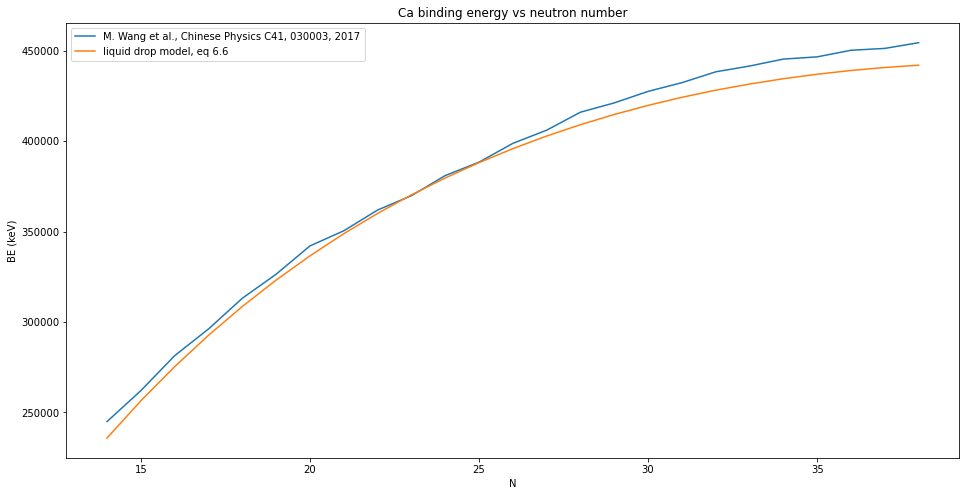

In [122]:
fig = plt.figure(figsize=(16,8))

sns.lineplot(x='N', y='BE (keV)', data=calcium_iso)
sns.lineplot(x='N', y='BE predict (keV)', data=calcium_iso)
plt.ylabel('BE (keV)')
plt.title('Ca binding energy vs neutron number')
plt.legend(['M. Wang et al., Chinese Physics C41, 030003, 2017', 'liquid drop model, eq 6.6'])

Text(0, 0.5, 'BE experiment - BE predict (keV)')

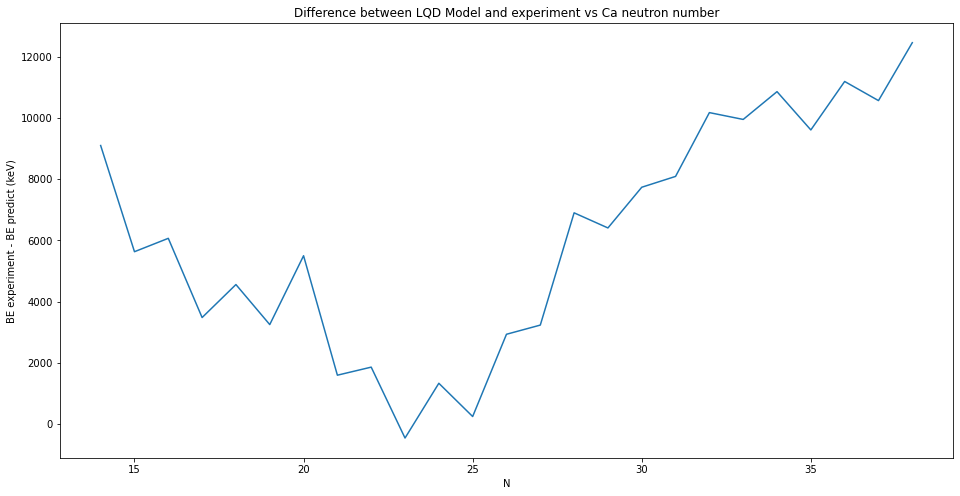

In [123]:
fig = plt.figure(figsize=(16,8))

sns.lineplot(x=calcium_iso['N'], y=calcium_iso['BE (keV)']-calcium_iso['BE predict (keV)'], data=calcium_iso)
plt.title('Difference between LQD Model and experiment vs Ca neutron number')
plt.ylabel('BE experiment - BE predict (keV)')

Difference between experiment and theory in binding energy for Ca is largest for large neutron number, e.g. 12 MeV around N=38. The difference drops almost to zero in the region N=23, likely because in this region, the symmetry energy term in the liquid drop model is smallest.

### HW01 question 4

Find the proton and neutron drip lines for calcium isotopes from the liquid drop model.
How do they compare with experiment?

In [124]:
# Let's compute neutron separation energy grouping by Z

def one_nucleon_sep(z_aggregate, name):
    original_indices = z_aggregate.index
    z_aggregate = z_aggregate.reset_index()
    
    num_iso = z_aggregate.shape[0]
    lqd_be = z_aggregate['BE predict (keV)']
    exp_be = z_aggregate['BE (keV)']

    lqd_sep = []  
    exp_sep = []
    for i in reversed(range(num_iso)):
        try:
            lqd_sep.append(lqd_be[i]-lqd_be[i-1])
            exp_sep.append(exp_be[i]-exp_be[i-1])
        except KeyError:
            lqd_sep.append(np.nan)
            exp_sep.append(np.nan)
    
    z_aggregate['S_{} predict (keV)'.format(name)] = lqd_sep[::-1]
    z_aggregate['S_{} experiment (keV)'.format(name)] = exp_sep[::-1]
    
    z_aggregate.index = original_indices
    
    return z_aggregate    

In [125]:
table_list = []
for Z in binding_df['Z'].unique():
    z_aggregate = binding_df[binding_df['Z'] == Z]
    table_list.append(one_nucleon_sep(z_aggregate, 'n'))
    
binding_sep_df = pd.concat(table_list)

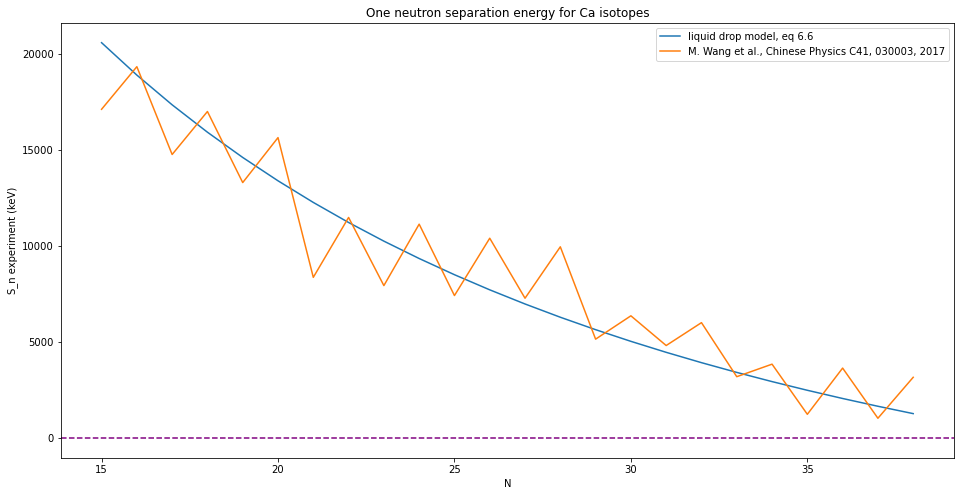

In [126]:
fig = plt.figure(figsize=(16,8))

sns.lineplot(x='N', y='S_n predict (keV)', data=binding_sep_df[binding_sep_df['Z'] == 20])
sns.lineplot(x='N', y='S_n experiment (keV)', data=binding_sep_df[binding_sep_df['Z'] == 20])
plt.axhline(0, color='purple', linestyle='--')

plt.title('One neutron separation energy for Ca isotopes')
plt.legend(['liquid drop model, eq 6.6', 'M. Wang et al., Chinese Physics C41, 030003, 2017'])

In [127]:
# We will now compute one proton separation energies by sorting by N
binding_sep_df = binding_sep_df.sort_values(by=['N','Z'])

In [128]:
table_list = []
for N in binding_sep_df['N'].unique():
    z_aggregate = binding_sep_df[binding_sep_df['N'] == N]
    table_list.append(one_nucleon_sep(z_aggregate, 'p'))
    
binding_sep_df = pd.concat(table_list)
binding_sep_df.head(10)

,level_0,index,Z,A,BE (keV),N,BE/A (keV),error BE (keV),BE predict (keV),S_n predict (keV),S_n experiment (keV),S_p predict (keV),S_p experiment (keV)
0,0,0,1,2,2224.566,1,1112.283,0.0001,3075.870608,NaN,NaN,NaN,NaN
6,6,6,2,3,7718.040,1,2572.680,0.0001,1163.731163,NaN,NaN,-1912.139445,5493.474
14,14,14,3,4,4615.040,1,1153.760,212.1321,-8008.621752,NaN,NaN,-9172.352915,-3103.000
25,25,25,4,5,90.000,1,18.000,-2005.0001,-20132.554793,NaN,NaN,-12123.933040,-4525.040
37,37,37,5,6,-2802.000,1,-467.000,-2004.0001,-33808.220217,NaN,NaN,-13675.665424,-2892.000
1,1,1,1,3,8481.795,2,2827.265,0.0001,2613.549587,-462.321021,6257.229,NaN,NaN
7,7,7,2,4,28295.660,2,7073.915,0.0001,16786.790677,15623.059514,20577.620,14173.241090,19813.865
15,15,15,3,5,26330.660,2,5266.132,50.0001,18880.701716,26889.323469,21715.620,2093.911039,-1965.000
26,26,26,4,6,26923.482,2,4487.247,5.4481,14843.944722,34976.499514,26833.482,-4036.756995,592.822
38,38,38,5,7,24910.936,2,3558.705,25.1511,7213.962331,41022.182548,27712.936,-7629.982391,-2012.546


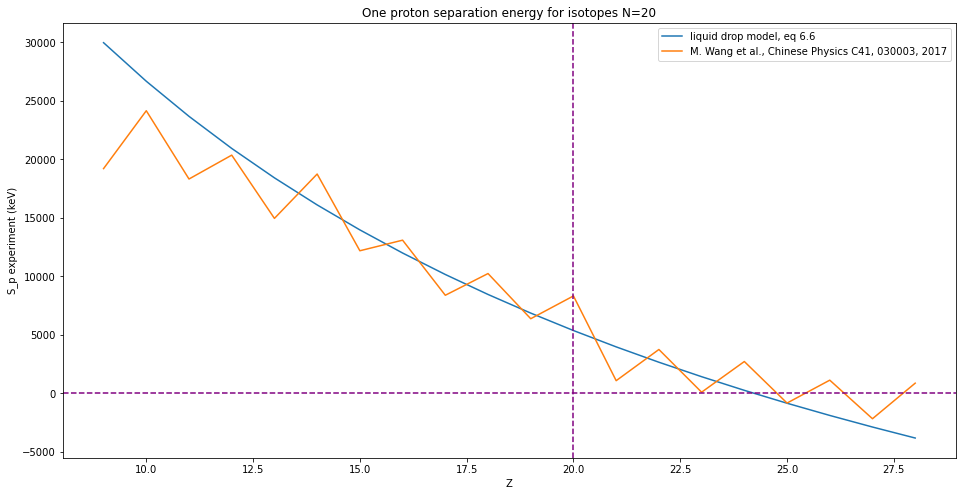

In [153]:
fig = plt.figure(figsize=(16,8))

sns.lineplot(x='Z', y='S_p predict (keV)', 
             data=binding_sep_df[binding_sep_df['N'] == 20], 
             ci=None)
sns.lineplot(x='Z', y='S_p experiment (keV)', 
             data=binding_sep_df[binding_sep_df['N'] == 20], 
             ci=None)

plt.title('One proton separation energy for isotopes N=20')
plt.axvline(20, color='purple', linestyle='--')
plt.axhline(0, color='purple', linestyle='--')
plt.legend(['liquid drop model, eq 6.6', 'M. Wang et al., Chinese Physics C41, 030003, 2017'])

### HW01 question 5

Find the three liquid-model coefficients α 1 , α 2 and α 4 and their errors from a fit to the
experimental binding energies.

In [160]:
# We will use the original table here to keep things simple. It's already ordered by A.
from scipy.optimize import curve_fit

def ldm(x, a, b, c):
    Z = x['Z']
    N = x['N']
    A = Z + N
    
    return a*A - b*A**(2/3) - 0.697*1000*Z**2/A**(1/3) - c*(N - Z)**2/A

fit_data = binding_df[(abs(binding_df['error BE (keV)']) < 100) & 
                      (binding_df['Z'] <= 50) &
                      (binding_df['N'] < 200)].reset_index()

x_data = fit_data[['Z', 'N']]
y_data = fit_data['BE (keV)']

popt, pcov = curve_fit(ldm, x_data, y_data)

y_pred = ldm(x_data, *popt)

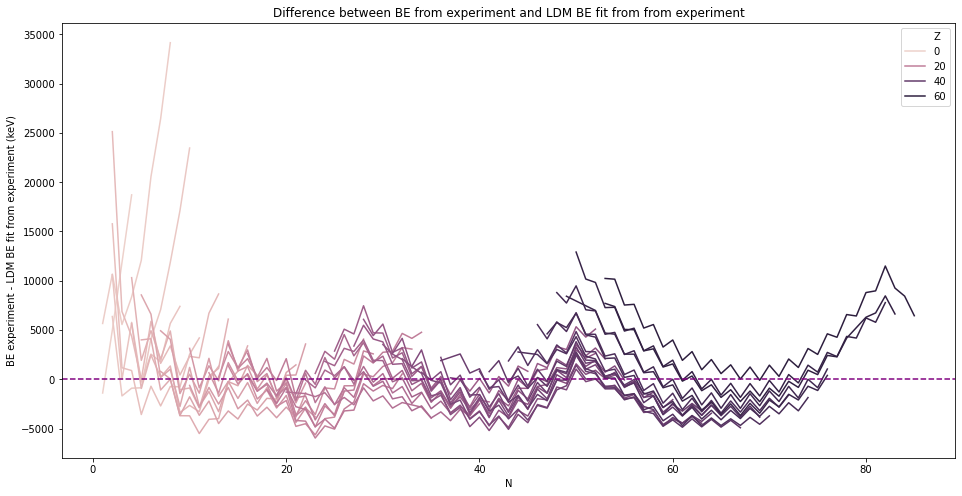

In [166]:
fig = plt.figure(figsize=(16,8))
sns.lineplot(x=x_data['N'], y=y_data-y_pred, hue=x_data['Z'])
plt.ylabel('BE experiment - LDM BE fit from experiment (keV)')
plt.title('Difference between BE from experiment and LDM BE fit from from experiment')
plt.axhline(0,color='purple', linestyle='--')

### HW01 question 6

Redo the liquid drop fit with the extra term α 5 (N − Z) 4 /A 3 .